In [1]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

### Read in and format data

In [2]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [3]:
ff_dfs = [] # create empty list so we can eventually concat all dfs

for year in years: 
    df = pd.read_csv(f'./CSVs/four factors/league_four_factors_{year}.csv') # read in each csv and name appropriately
    df['year'] = f'{year}' # create a column to label the data by {year}
    df['team_year'] = df['Team'] + ' ' + df['year']
    ff_dfs.append(df) # add df to list
    
ff_df = pd.concat(ff_dfs) # concat all dfs in the list

percent_cols = ['OFFENSE: eFG%','OFFENSE: TOV%', 'OFFENSE: ORB%', 'DEFENSE: eFG%', 'DEFENSE: TOV%', 'DEFENSE: ORB%']

# Convert percentage columns to floats
for col in percent_cols:
    ff_df[col] = ff_df[col].str.rstrip('%').astype('float') / 100.0
    
ff_df.dropna(axis = 1, inplace= True) #drop the columns which contain NaNs.  These are the "ranking columns".
ff_df.drop(columns = ['W', 'L', 'Diff'], inplace = True)

ff_df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013


In [4]:
play_context_halfcourt = []
for year in years: 
    df = pd.read_csv(f'./CSVs/play context/league_offense_halfcourt_and_putbacks_{year}.csv') # read in each csv and name appropriately
    df['year'] = f'{year}' # create a column to label the data by {year}
    df['team_year'] = df['Team'] + ' ' + df['year']
    play_context_halfcourt.append(df) # add df to list
    
playcontext_halfcourt_df = pd.concat(play_context_halfcourt) # concat all dfs in the list

# Convert percentage columns to floats
percent_cols = ['HALFCOURT: OREB%', 'HALFCOURT: % of Plays']
for col in percent_cols:
    playcontext_halfcourt_df[col] = playcontext_halfcourt_df[col].str.rstrip('%').astype('float') / 100.0
    
playcontext_halfcourt_df.dropna(axis = 1, inplace= True) #drop the columns which contain NaNs.  These are the "ranking columns"

playcontext_halfcourt_df.drop(columns = 'Pts/Poss', inplace = True) #already have this column in a previous df

playcontext_halfcourt_df.head()

,Team,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,year,team_year
0,Average,87.4,0.294,0.802,19.0,17.5,105.5,2013,Average 2013
1,Atlanta,88.1,0.243,0.783,15.2,13.3,111.9,2013,Atlanta 2013
2,Boston,89.2,0.225,0.809,14.0,12.8,107.0,2013,Boston 2013
3,Brooklyn,89.8,0.332,0.819,20.4,19.9,98.7,2013,Brooklyn 2013
4,Charlotte,81.0,0.297,0.790,17.0,15.7,105.0,2013,Charlotte 2013


In [5]:
play_context_transition = []
for year in years: 
    df = pd.read_csv(f'./CSVs/play context/league_offense_transition_{year}.csv') # read in each csv and name appropriately
    df['year'] = f'{year}' # create a column to label the data by {year}
    df['team_year'] = df['Team'] + ' ' + df['year']
    play_context_transition.append(df) # add df to list
    
playcontext__transition_df = pd.concat(play_context_transition) # concat all dfs in the list

# Convert percentage columns to floats
percent_cols = ['ALL TRANSITION: Freq', 'OFF STEALS: Freq', 'OFF LIVE REBOUNDS: Freq']
for col in percent_cols:
    playcontext__transition_df[col] = playcontext__transition_df[col].str.rstrip('%').astype('float') / 100.0

playcontext__transition_df.dropna(axis = 1, inplace= True) #drop the columns which contain NaNs.  These are the "ranking columns"

playcontext__transition_df.drop(columns = 'Pts/Poss', inplace = True) #already have this column in a previous df
    
playcontext__transition_df.head()   

,Team,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,year,team_year
0,Average,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,2013,Average 2013
1,Atlanta,4.7,0.178,125.9,2.2,0.650,138.3,2.5,0.350,120.1,2013,Atlanta 2013
2,Boston,3.4,0.155,121.2,2.0,0.565,137.2,1.5,0.305,113.9,2013,Boston 2013
3,Brooklyn,2.7,0.111,120.8,1.8,0.496,139.8,0.8,0.202,109.4,2013,Brooklyn 2013
4,Charlotte,4.5,0.159,126.7,2.1,0.589,141.7,2.4,0.344,120.4,2013,Charlotte 2013


In [6]:
shooting_accuracy = []
for year in years: 
    df = pd.read_csv(f'./CSVs/shooting/league_offense_shooting_accuracy_{year}.csv') # read in each csv and name appropriately
    df['year'] = f'{year}' # create a column to label the data by {year}
    df['team_year'] = df['Team'] + ' ' + df['year']
    shooting_accuracy.append(df) # add df to list
    
shooting_accuracy_df = pd.concat(shooting_accuracy) # concat all dfs in the list

# Convert percentage columns to floats
percent_cols = ['eFG%', 'Loc eFG%', 'Rim', 'Short Mid', 'Long Mid', 'All Mid', 'Corner Three', 'Non Corner', 'All Three']
for col in percent_cols:
    shooting_accuracy_df[col] = shooting_accuracy_df[col].str.rstrip('%').astype('float') / 100.0
    
shooting_accuracy_df.dropna(axis = 1, inplace= True) #drop the columns which contain NaNs.  These are the "ranking columns"

shooting_accuracy_df.rename(columns = {'Rim': 'Accuracy at Rim', 'Short Mid':'Accuracy on Short Midrange', 'Long Mid': 'Accuracy on Long Midrange', 
                                       'All Mid': 'Accuracy on All Midrange', 'Corner Three':'Accuracy on Corner Threes', 'Non Corner': 'Accuracy on Non Corner Threes',
                                      'All Three': 'Accuracy on All Threes'}, inplace = True)
    
shooting_accuracy_df.head()

,Team,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,year,team_year
0,Average,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,2013,Average 2013
1,Atlanta,0.523,0.507,0.654,0.375,0.393,0.385,0.429,0.366,0.384,2013,Atlanta 2013
2,Boston,0.507,0.499,0.598,0.400,0.440,0.426,0.401,0.350,0.368,2013,Boston 2013
3,Brooklyn,0.503,0.505,0.589,0.412,0.405,0.408,0.405,0.345,0.367,2013,Brooklyn 2013
4,Charlotte,0.463,0.503,0.552,0.339,0.384,0.366,0.392,0.334,0.347,2013,Charlotte 2013


In [7]:
shooting_frequency = []
for year in years: 
    df = pd.read_csv(f'./CSVs/shooting/league_offense_shooting_frequency_{year}.csv') # read in each csv and name appropriately
    df['year'] = f'{year}' # create a column to label the data by {year}
    df['team_year'] = df['Team'] + ' ' + df['year']
    shooting_frequency.append(df) # add df to list
    
shooting_frequency_df = pd.concat(shooting_frequency) # concat all dfs in the list
shooting_frequency_df.head()

# Convert percentage columns to floats
percent_cols = ['eFG%', 'Loc eFG%', 'Rim', 'Short Mid', 'Long Mid', 'All Mid', 'Corner Three', 'Non Corner', 'All Three']
for col in percent_cols:
    shooting_frequency_df[col] = shooting_frequency_df[col].str.rstrip('%').astype('float') / 100.0
    
shooting_frequency_df.dropna(axis = 1, inplace= True) #drop the columns which contain NaNs.  These are the "ranking columns"

shooting_frequency_df.drop(columns = ['eFG%', 'Loc eFG%'], inplace = True)

shooting_frequency_df.rename(columns = {'Rim': 'Frequency Rim', 'Short Mid':'Frequency Short Midrange', 'Long Mid': 'Frequency Long Midrange',
                                       'All Mid': 'Frequency all Midrange', 'Corner Three': 'Frequency Corner Threes', 'Non Corner': 'Frequency Non Corner Threes',
                                       'All Three': 'Frequency All Threes'}, inplace = True)
    
shooting_frequency_df.head()

,Team,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,year,team_year
0,Average,0.364,0.185,0.231,0.416,0.063,0.158,0.220,2013,Average 2013
1,Atlanta,0.348,0.166,0.222,0.388,0.075,0.189,0.264,2013,Atlanta 2013
2,Boston,0.353,0.163,0.289,0.452,0.070,0.125,0.195,2013,Boston 2013
3,Brooklyn,0.349,0.218,0.188,0.406,0.090,0.155,0.245,2013,Brooklyn 2013
4,Charlotte,0.388,0.178,0.250,0.427,0.040,0.145,0.185,2013,Charlotte 2013


##### Merge all dfs into one singular df called `df_all`

In [8]:
ff_df.shape, shooting_accuracy_df.shape, shooting_frequency_df.shape, playcontext_halfcourt_df.shape, playcontext__transition_df.shape

((310, 13), (310, 12), (310, 10), (310, 9), (310, 12))

In [9]:
df1 = pd.merge(ff_df, shooting_accuracy_df)
df1.shape

(310, 22)

In [10]:
df2 = pd.merge(df1, playcontext_halfcourt_df)
df2.shape

(310, 28)

In [11]:
df3 = pd.merge(df2, playcontext__transition_df)
df3.shape

(310, 37)

In [12]:
df_all = pd.merge(df3, shooting_frequency_df)
df_all.shape

(310, 44)

In [13]:
df_all.head(2)

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,0.364,0.185,0.231,0.416,0.063,0.158,0.220
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,0.354,0.193,0.236,0.430,0.058,0.158,0.216


In [14]:
# round all numerical columns to 3 decimal places
df_all = df_all.round(decimals = 3)

In [17]:
df_all.to_csv('./CSVs/full_merged_data.csv')

### EDA

In [15]:
shooting_accuracy_df.groupby('year').mean()

,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes
year,,,,,,,,,
2013,0.499677,0.503613,0.604774,0.382677,0.395677,0.390419,0.387097,0.356839,0.366097
2014,0.503903,0.507903,0.608742,0.391161,0.396516,0.394645,0.387419,0.357613,0.365742
2015,0.498452,0.502613,0.600774,0.391290,0.396226,0.394742,0.384839,0.345258,0.355968
2016,0.505194,0.508871,0.603194,0.398258,0.400290,0.399161,0.376742,0.353161,0.359387
2017,0.516806,0.519968,0.610613,0.411161,0.404484,0.408323,0.386355,0.355871,0.363452
2018,0.523935,0.527032,0.631516,0.397484,0.403387,0.400258,0.392677,0.359194,0.367097
2019,0.527258,0.530548,0.629613,0.401806,0.403065,0.402419,0.383452,0.353677,0.360968
2020,0.531323,0.534774,0.634806,0.398194,0.403613,0.400161,0.389645,0.354419,0.362806
2021,0.541452,0.544645,0.642226,0.425645,0.412645,0.421968,0.392032,0.363871,0.371032


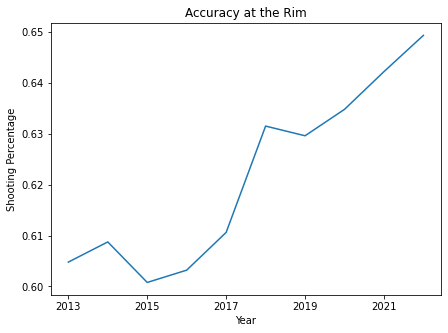

In [16]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy at Rim'].plot()
plt.title('Accuracy at the Rim')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

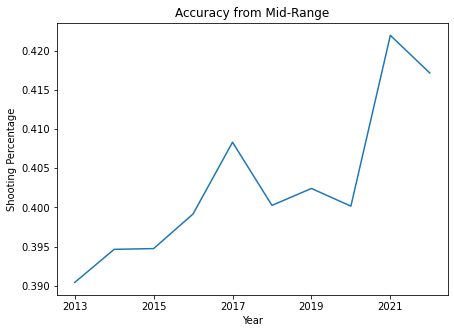

In [17]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy on All Midrange'].plot()
plt.title('Accuracy from Mid-Range')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

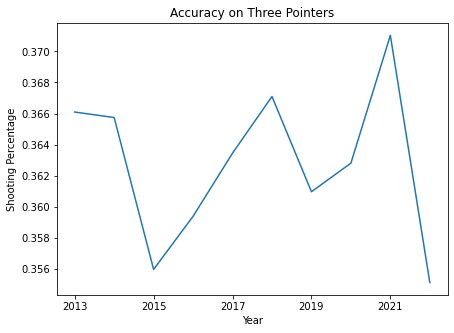

In [18]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy on All Threes'].plot()
plt.title('Accuracy on Three Pointers')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

<AxesSubplot:>

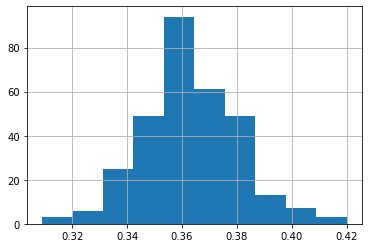

In [19]:
shooting_accuracy_df['Accuracy on All Threes'].hist()
# curious who these teams were who shot above 40% from Three.

In [20]:
# All Sniper Teams.  All teams who have shot over 40% as a team.
top_shooting_teams = shooting_accuracy_df[shooting_accuracy_df['Accuracy on All Threes'] > .4]
top_shooting_teams = top_shooting_teams[['Team', 'Accuracy on All Threes', 'year']]
top_shooting_teams.sort_values(by = 'Accuracy on All Threes', ascending = False)

,Team,Accuracy on All Threes,year
10,Golden State,0.420,2016
13,LA Clippers,0.418,2021
10,Golden State,0.414,2013
10,Golden State,0.407,2015
16,Miami,0.405,2013
27,San Antonio,0.401,2019
3,Brooklyn,0.401,2021


In [21]:
# Teams who shot the threes at the highest frequency.

top_shooting_teams = shooting_frequency_df[shooting_frequency_df['Frequency All Threes'] >.4]
top_shooting_teams = top_shooting_teams[['Team', 'Frequency All Threes', 'year']]
top_shooting_teams.sort_values(by = 'Frequency All Threes', ascending = False).head(10)

,Team,Frequency All Threes,year
11,Houston,0.486,2019
11,Houston,0.467,2018
11,Houston,0.462,2020
29,Utah,0.453,2021
11,Houston,0.438,2017
29,Utah,0.435,2022
10,Golden State,0.427,2022
18,Minnesota,0.425,2022
7,Dallas,0.424,2020
25,Portland,0.418,2021


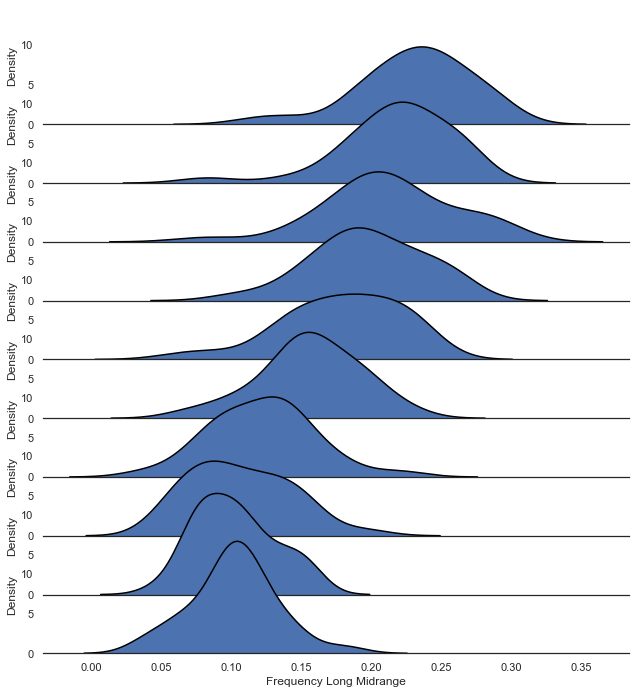

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(shooting_frequency_df, row= 'year', aspect=9, height=1)
g.map_dataframe(sns.kdeplot, x= 'Frequency Long Midrange', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Frequency Long Midrange', color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.despine(left=True);
plt.savefig('./Visuals/Ridge Plot Long Two Frequency.jpg', bbox_inches="tight", dpi=100)

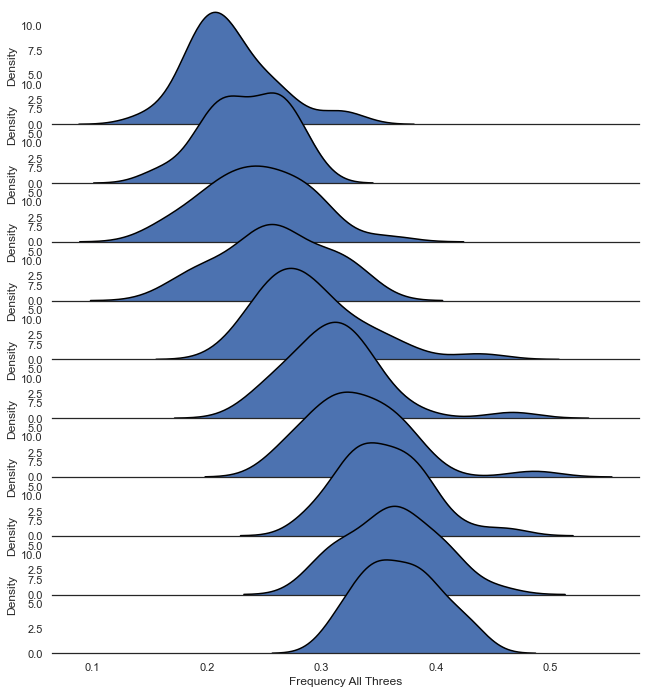

In [23]:
# source: https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(shooting_frequency_df, row= 'year', aspect=9, height=1)
g.map_dataframe(sns.kdeplot, x= 'Frequency All Threes', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Frequency All Threes', color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.despine(left=True);
plt.savefig('./Visuals/Ridge Plot 3pt Frequency.jpg', bbox_inches="tight", dpi=100)

# interesting to look at .4 and beyond on the x axis.  As the years go on, teams are shooting more and more frequently from three.
# the distribution each year tightens.  less variation among teams approach.  The Great Analytics Shift

In [24]:
# "average" columns provide a summary of the league as a whole that year
shooting_accuracy_df[shooting_accuracy_df['Team'] == 'Average']

,Team,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,year,team_year
0,Average,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,2013,Average 2013
0,Average,0.504,0.508,0.608,0.391,0.398,0.395,0.390,0.358,0.366,2014,Average 2014
0,Average,0.498,0.503,0.600,0.392,0.398,0.395,0.386,0.346,0.357,2015,Average 2015
0,Average,0.505,0.509,0.603,0.399,0.401,0.400,0.377,0.354,0.360,2016,Average 2016
0,Average,0.517,0.520,0.610,0.412,0.407,0.409,0.387,0.356,0.364,2017,Average 2017
0,Average,0.524,0.527,0.631,0.399,0.404,0.401,0.393,0.359,0.367,2018,Average 2018
0,Average,0.527,0.531,0.629,0.403,0.405,0.404,0.383,0.353,0.360,2019,Average 2019
0,Average,0.532,0.535,0.635,0.401,0.408,0.403,0.390,0.355,0.363,2020,Average 2020
0,Average,0.541,0.545,0.641,0.428,0.417,0.424,0.393,0.365,0.372,2021,Average 2021
0,Average,0.531,0.535,0.648,0.425,0.411,0.420,0.383,0.346,0.355,2022,Average 2022


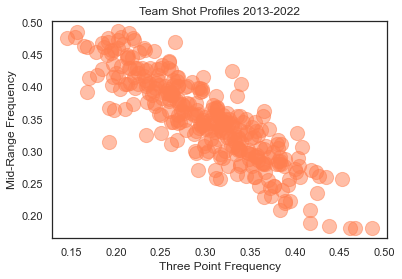

In [25]:
plt.scatter(shooting_frequency_df['Frequency All Threes'], shooting_frequency_df['Frequency all Midrange'], s = 200, alpha = .5, c = 'coral')
plt.title('Team Shot Profiles 2013-2022')
plt.xlabel('Three Point Frequency')
plt.ylabel('Mid-Range Frequency');